# Módulo 07 - Tarefa 02

## 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
plt.style.use("_classic_test_patch")
# plt.style.context("dark_background")

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [65]:
df0=pd.read_csv('minhabase.csv')
df0.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
3,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False
4,0,27.482192,4.024658,1,0,1,0,2.0,False,False,...,True,True,False,False,False,True,False,False,False,False


In [66]:
# Variavel target
y = df0.mau

# Variaveis explicativas
X = df0.drop('mau', axis=1)

# Separacao de dados teste e validacao
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [67]:
# Define objeto modelo
arv = DecisionTreeClassifier(random_state=100)
# Treina modelo com dados de treinamento
arv = arv.fit(X_train, y_train)
# Testa modelo com dados de treinamento
ypred_train = arv.predict(X_train)

[Text(0.6555663512943163, 0.9814814814814815, 'x[2] <= 4.955\ngini = 0.085\nsamples = 4739\nvalue = [4528, 211]\nclass = aprovados'),
 Text(0.40135381495029077, 0.9444444444444444, 'x[2] <= 4.949\ngini = 0.099\nsamples = 2594\nvalue = [2458, 136]\nclass = aprovados'),
 Text(0.39835250187582066, 0.9074074074074074, 'x[10] <= 0.5\ngini = 0.099\nsamples = 2592\nvalue = [2457, 135]\nclass = aprovados'),
 Text(0.26687652410429563, 0.8703703703703703, 'x[22] <= 0.5\ngini = 0.128\nsamples = 815\nvalue = [759.0, 56.0]\nclass = aprovados'),
 Text(0.23512239729881823, 0.8333333333333334, 'x[2] <= 4.647\ngini = 0.117\nsamples = 770\nvalue = [722, 48]\nclass = aprovados'),
 Text(0.21213187019320953, 0.7962962962962963, 'x[24] <= 0.5\ngini = 0.108\nsamples = 733\nvalue = [691, 42]\nclass = aprovados'),
 Text(0.18716000750328268, 0.7592592592592593, 'x[25] <= 0.5\ngini = 0.099\nsamples = 688\nvalue = [652, 36]\nclass = aprovados'),
 Text(0.1552241605702495, 0.7222222222222222, 'x[2] <= 3.816\ngini =

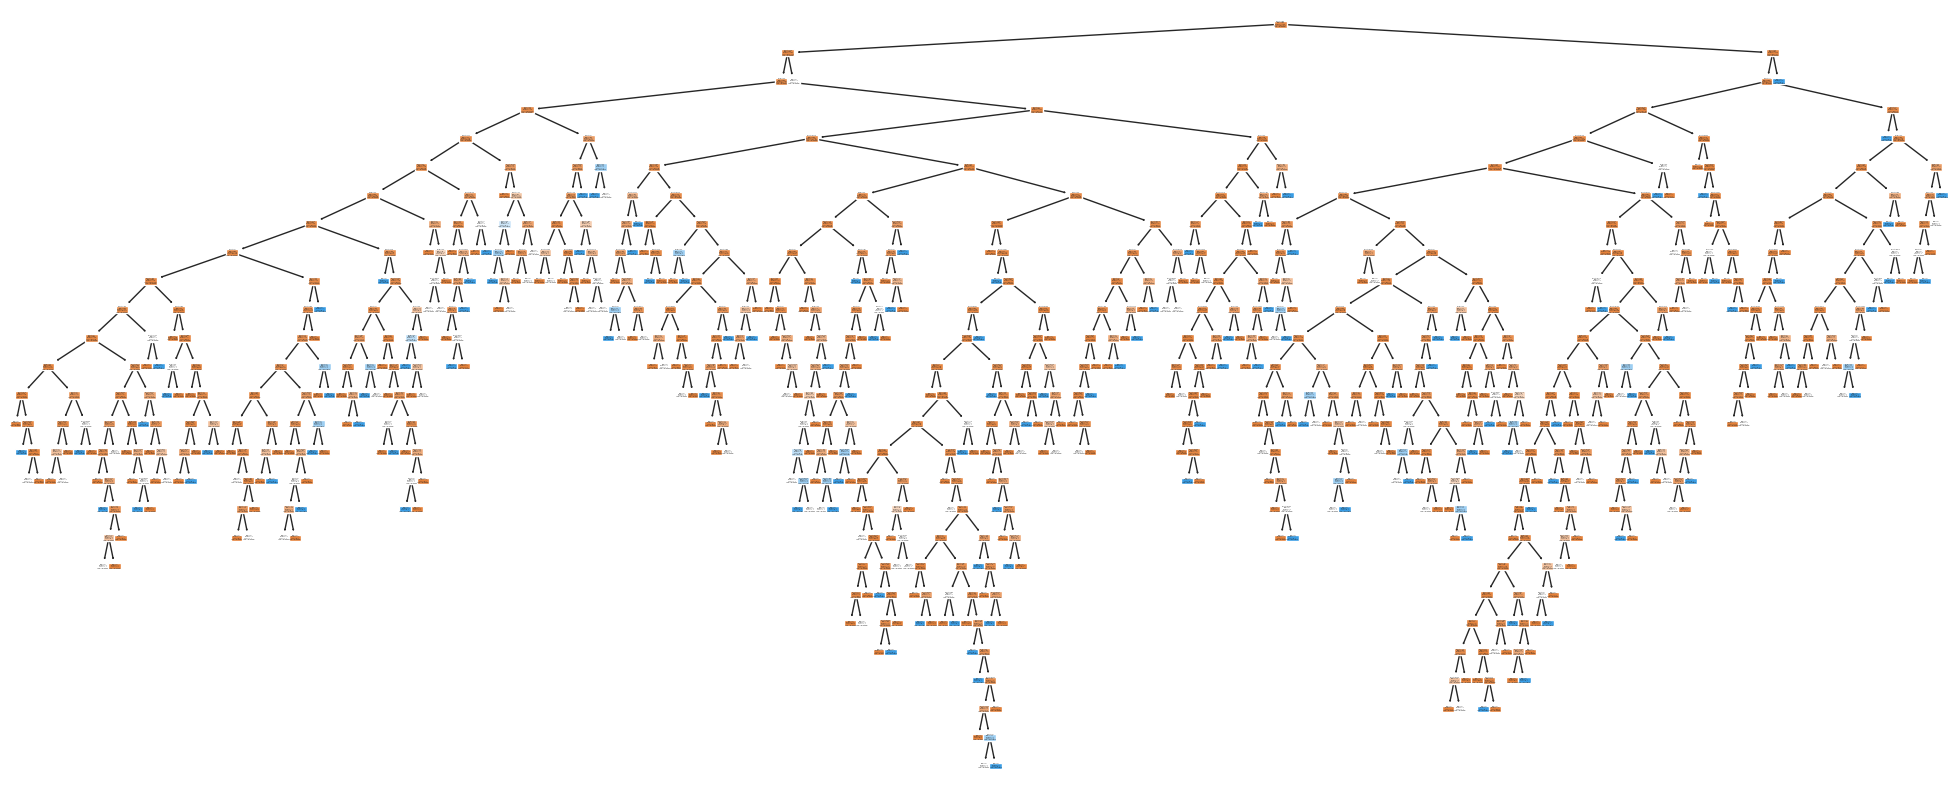

In [68]:
# Plota arvore
plt.figure(figsize=(25,10))
plot_tree(
    arv
    ,filled=True
    ,class_names=['aprovados', 'reprovados']
    # ,feature_names=list(X_train.columns)
)

array([[4528,    0],
       [  70,  141]], dtype=int64)

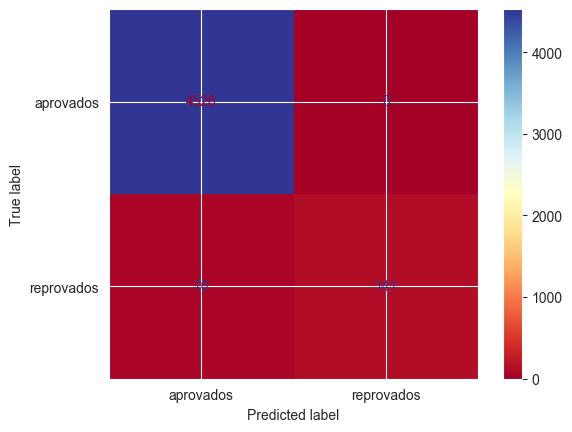

In [69]:
# Plota Matriz de Confusao do treinamento
cm = confusion_matrix(
    y_true=y_train
    , y_pred=ypred_train #arv.predict(X_train)
    , labels=arv.classes_
)
MC_train = ConfusionMatrixDisplay(
    confusion_matrix=cm
    , display_labels=['aprovados', 'reprovados']
)

MC_train.plot(
    cmap='RdYlBu'
)

MC_train.confusion_matrix

In [70]:
# Calcula acuracia
train_score = accuracy_score(
    y_true=y_train
    ,y_pred=ypred_train
)
train_score

0.9852289512555391

## 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [71]:
# Testa modelo com base de teste
ypred_test = arv.predict(X_test)

array([[1856,   88],
       [  77,   10]], dtype=int64)

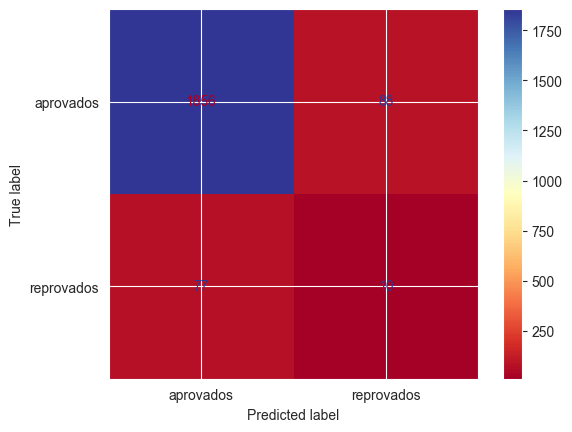

In [72]:
# Plota Matriz de Confusao do teste
cm = confusion_matrix(
    y_true=y_test
    , y_pred=ypred_test #arv.predict(X_test)
    , labels=arv.classes_
)
MC_test = ConfusionMatrixDisplay(
    confusion_matrix=cm
    , display_labels=['aprovados', 'reprovados']
)

MC_test.plot(cmap='RdYlBu')

MC_test.confusion_matrix

In [73]:
# Calcula acuracia
test_score = accuracy_score(
    y_true=y_test
    ,y_pred=ypred_test
)
test_score

0.9187592319054653

In [74]:
# Compara
print("Score de treinamento:", 100 *    train_score)
print("Score de teste:", 100 * test_score)

Score de treinamento: 98.52289512555392
Score de teste: 91.87592319054653


[Text(0.594777397260274, 0.9545454545454546, 'x[2] <= 4.955\ngini = 0.085\nsamples = 4739\nvalue = [4528, 211]\nclass = aprovados'),
 Text(0.3043664383561644, 0.8636363636363636, 'x[10] <= 0.5\ngini = 0.099\nsamples = 2594\nvalue = [2458, 136]\nclass = aprovados'),
 Text(0.15496575342465754, 0.7727272727272727, 'x[22] <= 0.5\ngini = 0.13\nsamples = 817\nvalue = [760, 57]\nclass = aprovados'),
 Text(0.12089041095890411, 0.6818181818181818, 'x[2] <= 4.647\ngini = 0.119\nsamples = 772\nvalue = [723, 49]\nclass = aprovados'),
 Text(0.09383561643835617, 0.5909090909090909, 'x[24] <= 0.5\ngini = 0.108\nsamples = 733\nvalue = [691, 42]\nclass = aprovados'),
 Text(0.07260273972602739, 0.5, 'x[25] <= 0.5\ngini = 0.099\nsamples = 688\nvalue = [652, 36]\nclass = aprovados'),
 Text(0.06712328767123288, 0.4090909090909091, 'x[2] <= 3.816\ngini = 0.095\nsamples = 679\nvalue = [645, 34]\nclass = aprovados'),
 Text(0.0410958904109589, 0.3181818181818182, 'x[4] <= 0.5\ngini = 0.083\nsamples = 576\nvalu

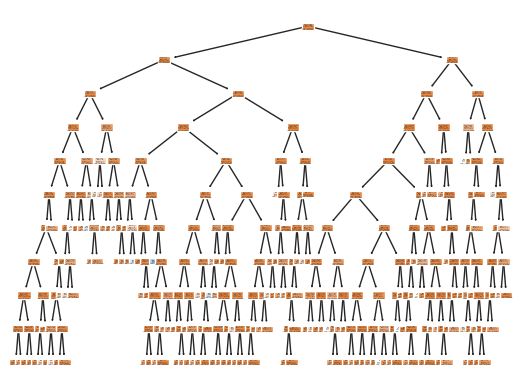

In [75]:
# Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123.

# Define objeto modelo
arv2 = DecisionTreeClassifier(
    random_state=123
    , min_samples_leaf=5
    , max_depth=10
)
# Treina modelo com dados de treinamento
arv2 = arv2.fit(X_train, y_train)

# Testa modelo com dados de treinamento
ypred_train2 = arv2.predict(X_train)

# Plota arvore 2
# plt.figure(figsize=(25,10))
plot_tree(
    arv2
    ,filled=True
    ,class_names=['aprovados', 'reprovados']
    # ,feature_names=list(X_train.columns)
)

[Text(0.6555663512943163, 0.9814814814814815, 'x[2] <= 4.955\ngini = 0.085\nsamples = 4739\nvalue = [4528, 211]\nclass = aprovados'),
 Text(0.40135381495029077, 0.9444444444444444, 'x[2] <= 4.949\ngini = 0.099\nsamples = 2594\nvalue = [2458, 136]\nclass = aprovados'),
 Text(0.39835250187582066, 0.9074074074074074, 'x[10] <= 0.5\ngini = 0.099\nsamples = 2592\nvalue = [2457, 135]\nclass = aprovados'),
 Text(0.26687652410429563, 0.8703703703703703, 'x[22] <= 0.5\ngini = 0.128\nsamples = 815\nvalue = [759.0, 56.0]\nclass = aprovados'),
 Text(0.23512239729881823, 0.8333333333333334, 'x[2] <= 4.647\ngini = 0.117\nsamples = 770\nvalue = [722, 48]\nclass = aprovados'),
 Text(0.21213187019320953, 0.7962962962962963, 'x[24] <= 0.5\ngini = 0.108\nsamples = 733\nvalue = [691, 42]\nclass = aprovados'),
 Text(0.18716000750328268, 0.7592592592592593, 'x[25] <= 0.5\ngini = 0.099\nsamples = 688\nvalue = [652, 36]\nclass = aprovados'),
 Text(0.1552241605702495, 0.7222222222222222, 'x[2] <= 3.816\ngini =

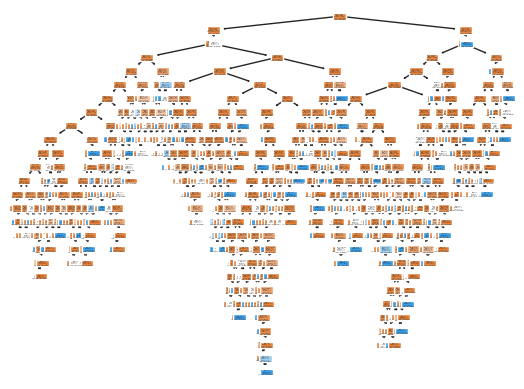

In [76]:
# Plota arvore 1 (comparacao)
# plt.figure(figsize=(25,10))
plot_tree(
    arv
    ,filled=True
    ,class_names=['aprovados', 'reprovados']
    # ,feature_names=list(X_train.columns)
)

In [90]:
# Calcula acuracia
train_score2 = accuracy_score(
    y_true=y_train
    ,y_pred=ypred_train2
)

# Testa modelo com dados de teste
ypred_test2 = arv2.predict(X_test)

# Calcula acuracia
test_score2 = accuracy_score(
    y_true=y_test
    ,y_pred=ypred_test2
)

array([[4517,   11],
       [ 195,   16]], dtype=int64)

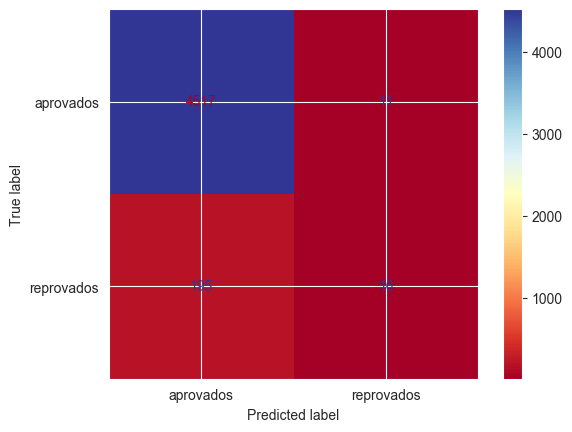

In [78]:
# Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

# Plota Matriz de Confusao do treinamento
cm = confusion_matrix(
    y_true=y_train
    , y_pred=ypred_train2
    , labels=arv.classes_
)
MC_train2 = ConfusionMatrixDisplay(
    confusion_matrix=cm
    , display_labels=['aprovados', 'reprovados']
)

MC_train2.plot(cmap='RdYlBu')

MC_train2.confusion_matrix

array([[1937,    7],
       [  87,    0]], dtype=int64)

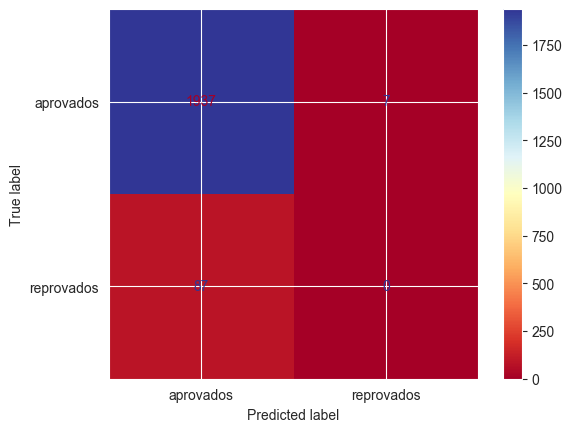

In [79]:
# Plota Matriz de Confusao do teste
cm = confusion_matrix(
    y_true=y_test
    , y_pred=ypred_test2
    , labels=arv.classes_
)
MC_test2 = ConfusionMatrixDisplay(
    confusion_matrix=cm
    , display_labels=['aprovados', 'reprovados']
)

MC_test2.plot(cmap='RdYlBu')

MC_test2.confusion_matrix

### Avaliação Árvore 1

In [80]:
MC_train.confusion_matrix

array([[4528,    0],
       [  70,  141]], dtype=int64)

In [81]:
MC_test.confusion_matrix

array([[1856,   88],
       [  77,   10]], dtype=int64)

In [82]:
# Compara
print("Score de treinamento:", 100 *    train_score)
print("Score de teste:", 100 * test_score)

Score de treinamento: 98.52289512555392
Score de teste: 91.87592319054653


### Avaliação Árvore 2

In [83]:
MC_train2.confusion_matrix

array([[4517,   11],
       [ 195,   16]], dtype=int64)

In [84]:
MC_test2.confusion_matrix

array([[1937,    7],
       [  87,    0]], dtype=int64)

In [91]:
# Compara
print("Score de treinamento:", 100 * train_score2)
print("Score de teste:", 100 * test_score2)

Score de treinamento: 95.65309136948723
Score de teste: 95.37173806006894


### Como ficaria a acurácia se todos os contratos fossem classificados como ‘bons’?

> O modelo seria *overfit* a aprovar todos os proponentes pois não haveria diferença no aprendizado. Logo a acurácia de treinamento, neste caso, seria 100%. Entretanto, pouco útil seria o modelo.

> O código abaixo preserva as mesmas características da base de treinamento e teste, com exceção de que a saída de treinamento a qual impõe que todos sejam `mau=False`.

In [56]:
df1 = df0.copy()
df1['mau_false'] = False
df1[['mau','mau_false']].value_counts()

mau    mau_false
False  False        6472
True   False         298
Name: count, dtype: int64

In [97]:
# Variavel target
y2 = df1.mau_false

# Variaveis explicativas
X2 = df1.drop(['mau','mau_false'], axis=1)

# Separacao de dados teste e validacao
_, _, y_bons, _ = train_test_split(X2, y2, test_size=0.3, random_state=100)

# Novo treinamento classificando todos como 'bons'
arv3 = arv2.fit(X_train, y_bons)

# Testa modelo com base de treinamento
ypred_train3 = arv3.predict(X_train)

# Testa modelo com base de teste
ypred_test3 = arv3.predict(X_test)

# Matriz Confusao
cm = confusion_matrix(
    y_true=y_bons
    , y_pred=ypred_train3
    , labels=arv.classes_
)
MC_train3 = ConfusionMatrixDisplay(
    confusion_matrix=cm
    , display_labels=['aprovados', 'reprovados']
)

# MC_test3.plot(cmap='RdYlBu')

MC_train3.confusion_matrix

array([[4739,    0],
       [   0,    0]], dtype=int64)

In [95]:
# Calcula acuracia
train_score3 = accuracy_score(
    y_true=y_bons
    ,y_pred=ypred_train3
)
train_score3

1.0

In [96]:
test_score3 = accuracy_score(
    y_true=y_test
    ,y_pred=ypred_test3
)
test_score3

0.9571639586410635